In [74]:
## import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df1=pd.read_csv('main.csv')
df1

area_type   availability                  location  \
0      Super built-up  Area         19-Dec  Electronic City Phase II   
1                Plot  Area  Ready To Move          Chikka Tirupathi   
2            Built-up  Area  Ready To Move               Uttarahalli   
3      Super built-up  Area  Ready To Move        Lingadheeranahalli   
4      Super built-up  Area  Ready To Move                  Kothanur   
...                     ...            ...                       ...   
13315        Built-up  Area  Ready To Move                Whitefield   
13316  Super built-up  Area  Ready To Move             Richards Town   
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar   
13318  Super built-up  Area         18-Jun           Padmanabhanagar   
13319  Super built-up  Area  Ready To Move              Doddathoguru   

            size  society total_sqft  bath  balcony   price  
0          2 BHK  Coomee        1056   2.0      1.0   39.07  
1      4 Bedroom  Theanmp       2600   5.0      3.0  120.00  
2          3 BHK      NaN       1440   2.0      3.0   62.00  
3          3 BHK  Soiewre       1521   3.0      1.0   95.00  
4          2 BHK      NaN       1200   2.0      1.0   51.00  
...          ...      ...        ...   ...      ...     ...  
13315  5 Bedroom  ArsiaEx       3453   4.0      0.0  231.00  
13316      4 BHK      NaN       3600   5.0      NaN  400.00  
13317      2 BHK  Mahla T       1141   2.0      1.0   60.00  
13318      4 BHK  SollyCl       4689   4.0      1.0  488.00  
13319      1 BHK      NaN        550   1.0      1.0   17.00  

[13320 rows x 9 columns]

In [75]:
df1.shape

(13320, 9)

In [76]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [77]:
df2=df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2

location       size total_sqft  bath   price
0      Electronic City Phase II      2 BHK       1056   2.0   39.07
1              Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2                   Uttarahalli      3 BHK       1440   2.0   62.00
3            Lingadheeranahalli      3 BHK       1521   3.0   95.00
4                      Kothanur      2 BHK       1200   2.0   51.00
...                         ...        ...        ...   ...     ...
13315                Whitefield  5 Bedroom       3453   4.0  231.00
13316             Richards Town      4 BHK       3600   5.0  400.00
13317     Raja Rajeshwari Nagar      2 BHK       1141   2.0   60.00
13318           Padmanabhanagar      4 BHK       4689   4.0  488.00
13319              Doddathoguru      1 BHK        550   1.0   17.00

[13320 rows x 5 columns]

### Data cleaning


In [78]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [79]:
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [80]:
df3.shape

(13246, 5)

In [81]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [82]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3

C:\Users\hmodi\AppData\Local\Temp\ipykernel_18668\2355601815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))


location       size total_sqft  bath   price  bhk
0      Electronic City Phase II      2 BHK       1056   2.0   39.07    2
1              Chikka Tirupathi  4 Bedroom       2600   5.0  120.00    4
2                   Uttarahalli      3 BHK       1440   2.0   62.00    3
3            Lingadheeranahalli      3 BHK       1521   3.0   95.00    3
4                      Kothanur      2 BHK       1200   2.0   51.00    2
...                         ...        ...        ...   ...     ...  ...
13315                Whitefield  5 Bedroom       3453   4.0  231.00    5
13316             Richards Town      4 BHK       3600   5.0  400.00    4
13317     Raja Rajeshwari Nagar      2 BHK       1141   2.0   60.00    2
13318           Padmanabhanagar      4 BHK       4689   4.0  488.00    4
13319              Doddathoguru      1 BHK        550   1.0   17.00    1

[13246 rows x 6 columns]

In [83]:
df3['bhk'].unique()


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [84]:
df3[df3.bhk>20]

location        size total_sqft  bath  price  bhk
1718  2Electronic City Phase II      27 BHK       8000  27.0  230.0   27
4684                Munnekollal  43 Bedroom       2400  40.0  660.0   43

In [85]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [86]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
    

In [87]:
df3[~df3['total_sqft'].apply(is_float)]['total_sqft'].unique()


array(['2100 - 2850', '3067 - 8156', '1042 - 1105', '1145 - 1340',
       '1015 - 1540', '34.46Sq. Meter', '1195 - 1440', '4125Perch',
       '1120 - 1145', '3090 - 5002', '1160 - 1195', '1000Sq. Meter',
       '1115 - 1130', '1100Sq. Yards', '520 - 645', '1000 - 1285',
       '650 - 665', '633 - 666', '5.31Acres', '30Acres', '1445 - 1455',
       '884 - 1116', '850 - 1093', '716Sq. Meter', '547.34 - 827.31',
       '580 - 650', '3425 - 3435', '1804 - 2273', '3630 - 3800',
       '4000 - 5249', '1500Sq. Meter', '142.61Sq. Meter', '1574Sq. Yards',
       '1250 - 1305', '670 - 980', '1005.03 - 1252.49', '1004 - 1204',
       '361.33Sq. Yards', '645 - 936', '2710 - 3360', '2830 - 2882',
       '596 - 804', '1255 - 1863', '1300 - 1405', '117Sq. Yards',
       '934 - 1437', '980 - 1030', '2249.81 - 4112.19', '1070 - 1315',
       '3040Sq. Meter', '500Sq. Yards', '2806 - 3019', '613 - 648',
       '704 - 730', '1210 - 1477', '3369 - 3464', '1125 - 1500',
       '167Sq. Meter', '1076 - 1199',

In [88]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [89]:
df4=df3.copy()
df4['total_sqft']=df3['total_sqft'].apply(convert_sqft_to_num)

In [90]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

##### video-3

In [91]:
df5=df4.copy()
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']
df5

location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13315                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13316             Richards Town      4 BHK      3600.0   5.0  400.00    4   
13317     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13318           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   
13319              Doddathoguru      1 BHK       550.0   1.0   17.00    1   

       price_per_sqft  
0         3699.810606  
1         4615.384615  
2         4305.555556  
3         6245.890861  
4         4250.000000  
...               ...  
13315     6689.834926  
13316    11111.111111  
13317     5258.545136  
13318    10407.336319  
13319     3090.909091  

[13246 rows x 7 columns]

In [92]:
len(df5.location.unique())

1304

In [93]:
df5.location=df5.location.apply(lambda x: x.strip())
location_states=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_states

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [95]:
len(location_states[location_states<=10])

1052

In [97]:
location_states_less_than_10=location_states[location_states<=10]
location_states_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [105]:
len(df5.location.unique())

1293

In [106]:
df5.location=df5.location.apply(lambda x: 'other' if x in location_states_less_than_10 else x)

In [107]:
len(df5.location.unique())

242

##### video-4

In [113]:
df5[df5.total_sqft/df5.bhk<300].head()


location       size  total_sqft  bath  price  bhk  \
9                 other  6 Bedroom      1020.0   6.0  370.0    6   
45           HSR Layout  8 Bedroom       600.0   9.0  200.0    8   
58        Murugeshpalya  6 Bedroom      1407.0   4.0  150.0    6   
68  Devarachikkanahalli  8 Bedroom      1350.0   7.0   85.0    8   
70                other  3 Bedroom       500.0   3.0  100.0    3   

    price_per_sqft  
9     36274.509804  
45    33333.333333  
58    10660.980810  
68     6296.296296  
70    20000.000000

In [114]:
df5.shape

(13246, 7)

In [111]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]

In [115]:
df6.shape

(12502, 7)

In [116]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [122]:
def remove_pps_outlier(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7=remove_pps_outlier(df6)

# IQR is better then standard devision
df7.shape

(10241, 7)

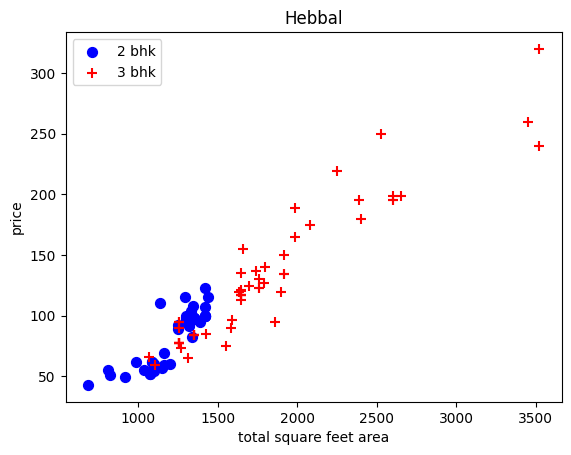

In [134]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 bhk',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color='red',marker='+',label='3 bhk',s=50)
    plt.xlabel('total square feet area')
    plt.ylabel('price')
    plt.title(location)
    plt.legend()

plot_scatter_chart(df7,'Hebbal')

In [131]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df8=remove_bhk_outliers(df7)
df8.shape

(7329, 7)

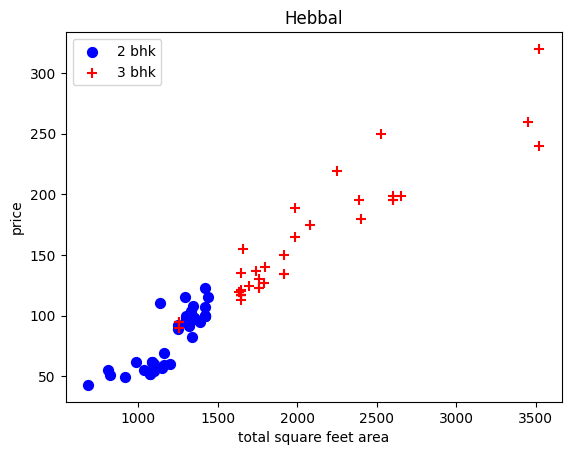

In [135]:
plot_scatter_chart(df8,'Hebbal')

Text(0, 0.5, 'count')

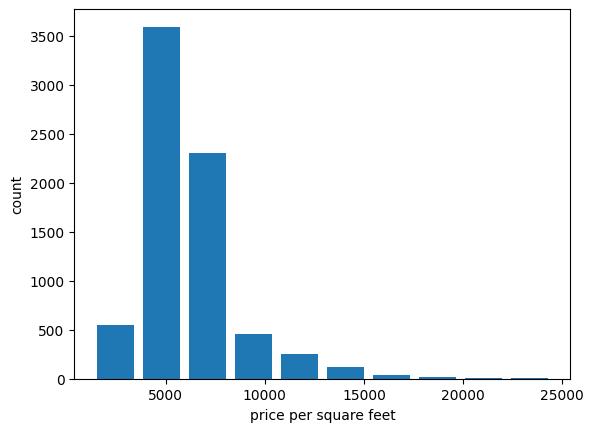

In [136]:
import matplotlib.pyplot as plt
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel('price per square feet')
plt.ylabel('count')

In [137]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [138]:
df8[df8.bath>10]

location    size  total_sqft  bath  price  bhk  price_per_sqft
5277  Neeladri Nagar  10 BHK      4000.0  12.0  160.0   10     4000.000000
8486           other  10 BHK     12000.0  12.0  525.0   10     4375.000000
8575           other  16 BHK     10000.0  16.0  550.0   16     5500.000000
9308           other  11 BHK      6000.0  12.0  150.0   11     2500.000000
9639           other  13 BHK      5425.0  13.0  275.0   13     5069.124424

Text(0, 0.5, 'count')

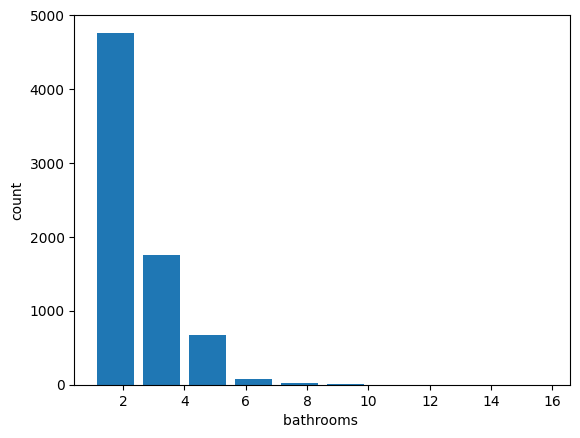

In [139]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel('bathrooms ')
plt.ylabel('count')


In [140]:
df8[df8.bath>df8.bhk+2]

location       size  total_sqft  bath   price  bhk  price_per_sqft
1626  Chikkabanavar  4 Bedroom      2460.0   7.0    80.0    4     3252.032520
5238     Nagasandra  4 Bedroom      7000.0   8.0   450.0    4     6428.571429
6711    Thanisandra      3 BHK      1806.0   6.0   116.0    3     6423.034330
8411          other      6 BHK     11338.0   9.0  1000.0    6     8819.897689

In [142]:
df9=df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 7)

In [143]:
df10=df9.drop(['size','price_per_sqft'],axis='columns')

In [144]:
df10

location  total_sqft  bath  price  bhk
0      1st Block Jayanagar      2850.0   4.0  428.0    4
1      1st Block Jayanagar      1630.0   3.0  194.0    3
2      1st Block Jayanagar      1875.0   2.0  235.0    3
3      1st Block Jayanagar      1200.0   2.0  130.0    3
4      1st Block Jayanagar      1235.0   2.0  148.0    2
...                    ...         ...   ...    ...  ...
10232                other      1200.0   2.0   70.0    2
10233                other      1800.0   1.0  200.0    1
10236                other      1353.0   2.0  110.0    2
10237                other       812.0   1.0   26.0    1
10240                other      3600.0   5.0  400.0    4

[7251 rows x 5 columns]

### model

In [148]:
dummies=pd.get_dummies(df10.location,dtype=int)
dummies.head()

1st Block Jayanagar  1st Phase JP Nagar  2nd Phase Judicial Layout  \
0                    1                   0                          0   
1                    1                   0                          0   
2                    1                   0                          0   
3                    1                   0                          0   
4                    1                   0                          0   

   2nd Stage Nagarbhavi  5th Block Hbr Layout  5th Phase JP Nagar  \
0                     0                     0                   0   
1                     0                     0                   0   
2                     0                     0                   0   
3                     0                     0                   0   
4                     0                     0                   0   

   6th Phase JP Nagar  7th Phase JP Nagar  8th Phase JP Nagar  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   9th Phase JP Nagar  ...  Vishveshwarya Layout  Vishwapriya Layout  \
0                   0  ...                     0                   0   
1                   0  ...                     0                   0   
2                   0  ...                     0                   0   
3                   0  ...                     0                   0   
4                   0  ...                     0                   0   

   Vittasandra  Whitefield  Yelachenahalli  Yelahanka  Yelahanka New Town  \
0            0           0               0          0                   0   
1            0           0               0          0                   0   
2            0           0               0          0                   0   
3            0           0               0          0                   0   
4            0           0               0          0                   0   

   Yelenahalli  Yeshwanthpur  other  
0            0             0      0  
1            0             0      0  
2            0             0      0  
3            0             0      0  
4            0             0      0  

[5 rows x 242 columns]

In [150]:
df11=pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')

In [151]:
df11

location  total_sqft  bath  price  bhk  1st Block Jayanagar  \
0      1st Block Jayanagar      2850.0   4.0  428.0    4                    1   
1      1st Block Jayanagar      1630.0   3.0  194.0    3                    1   
2      1st Block Jayanagar      1875.0   2.0  235.0    3                    1   
3      1st Block Jayanagar      1200.0   2.0  130.0    3                    1   
4      1st Block Jayanagar      1235.0   2.0  148.0    2                    1   
...                    ...         ...   ...    ...  ...                  ...   
10232                other      1200.0   2.0   70.0    2                    0   
10233                other      1800.0   1.0  200.0    1                    0   
10236                other      1353.0   2.0  110.0    2                    0   
10237                other       812.0   1.0   26.0    1                    0   
10240                other      3600.0   5.0  400.0    4                    0   

       1st Phase JP Nagar  2nd Phase Judicial Layout  2nd Stage Nagarbhavi  \
0                       0                          0                     0   
1                       0                          0                     0   
2                       0                          0                     0   
3                       0                          0                     0   
4                       0                          0                     0   
...                   ...                        ...                   ...   
10232                   0                          0                     0   
10233                   0                          0                     0   
10236                   0                          0                     0   
10237                   0                          0                     0   
10240                   0                          0                     0   

       5th Block Hbr Layout  ...  Vijayanagar  Vishveshwarya Layout  \
0                         0  ...            0                     0   
1                         0  ...            0                     0   
2                         0  ...            0                     0   
3                         0  ...            0                     0   
4                         0  ...            0                     0   
...                     ...  ...          ...                   ...   
10232                     0  ...            0                     0   
10233                     0  ...            0                     0   
10236                     0  ...            0                     0   
10237                     0  ...            0                     0   
10240                     0  ...            0                     0   

       Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0                       0            0           0               0          0   
1                       0            0           0               0          0   
2                       0            0           0               0          0   
3                       0            0           0               0          0   
4                       0            0           0               0          0   
...                   ...          ...         ...             ...        ...   
10232                   0            0           0               0          0   
10233                   0            0           0               0          0   
10236                   0            0           0               0          0   
10237                   0            0           0               0          0   
10240                   0            0           0               0          0   

       Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0                       0            0             0  
1                       0            0             0  
2                       0            0             0  
3                       0            0             0  
4      

In [153]:
df12=df11.drop('location',axis='columns')
df12

total_sqft  bath  price  bhk  1st Block Jayanagar  1st Phase JP Nagar  \
0          2850.0   4.0  428.0    4                    1                   0   
1          1630.0   3.0  194.0    3                    1                   0   
2          1875.0   2.0  235.0    3                    1                   0   
3          1200.0   2.0  130.0    3                    1                   0   
4          1235.0   2.0  148.0    2                    1                   0   
...           ...   ...    ...  ...                  ...                 ...   
10232      1200.0   2.0   70.0    2                    0                   0   
10233      1800.0   1.0  200.0    1                    0                   0   
10236      1353.0   2.0  110.0    2                    0                   0   
10237       812.0   1.0   26.0    1                    0                   0   
10240      3600.0   5.0  400.0    4                    0                   0   

       2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0                              0                     0                     0   
1                              0                     0                     0   
2                              0                     0                     0   
3                              0                     0                     0   
4                              0                     0                     0   
...                          ...                   ...                   ...   
10232                          0                     0                     0   
10233                          0                     0                     0   
10236                          0                     0                     0   
10237                          0                     0                     0   
10240                          0                     0                     0   

       5th Phase JP Nagar  ...  Vijayanagar  Vishveshwarya Layout  \
0                       0  ...            0                     0   
1                       0  ...            0                     0   
2                       0  ...            0                     0   
3                       0  ...            0                     0   
4                       0  ...            0                     0   
...                   ...  ...          ...                   ...   
10232                   0  ...            0                     0   
10233                   0  ...            0                     0   
10236                   0  ...            0                     0   
10237                   0  ...            0                     0   
10240                   0  ...            0                     0   

       Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0                       0            0           0               0          0   
1                       0            0           0               0          0   
2                       0            0           0               0          0   
3                       0            0           0               0          0   
4                       0            0           0               0          0   
...                   ...          ...         ...             ...        ...   
10232                   0            0           0               0          0   
10233                   0            0           0               0          0   
10236                   0            0           0               0          0   
10237                   0            0           0               0          0   
10240                   0            0           0               0          0   

       Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0                       0            0             0  
1                       0            0             0  
2                       0            0             0  
3                       0            0             0  
4       

In [154]:
df12.shape

(7251, 245)

In [189]:
x=df12.drop('price',axis='columns')
y=df12.price


In [167]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)


In [168]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(x_train,y_train)
model.score(x_test,y_test)

0.8452277697874226

In [169]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [171]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {}  # Removed 'normalize'
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],  # Fixed 'mse' issue
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Call the function with x and y
find_best_model_using_gridsearchcv(x, y)


model  best_score  \
0  linear_regression    0.818354   
1              lasso    0.687465   
2      decision_tree    0.715823   

                                         best_params  
0                                                 {}  
1                {'alpha': 2, 'selection': 'random'}  
2  {'criterion': 'squared_error', 'splitter': 'ra...

In [172]:
x.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [174]:
np.where(x.columns=='2nd Phase Judicial Layout')[0][0]

5

In [199]:

def predict_price(location,sqft,bath,bhk):
    global x
    loc_index=np.where(x.columns==location)[0][0]
    x1=np.zeros(len(x.columns))
    x1[0]=sqft
    x1[1]=bath
    x1[2]=bhk
    if loc_index>=0:
        x1[loc_index]=1
    return model1.predict([x1])[0]

In [200]:
predict_price('Hebbal',1000, 2, 2)

C:\Users\hmodi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


71.22519651412588

In [201]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

C:\Users\hmodi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.80519395173319

In [202]:
predict_price('Indira Nagar',1000, 3, 3)

C:\Users\hmodi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


184.58430202033847

#### export model using pickle

In [203]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(model1,f)

In [205]:
import json
columns={
    'data_columns':[col.lower() for col in x.columns]
    
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))